# 데이터 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('heart attack test.csv')

In [3]:
train = pd.read_csv('heart attack train.csv')

# 데이터 간결하게 확인

In [4]:
train.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
1,127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
2,111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
3,287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
4,108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1


In [5]:
test.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
1,159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
2,219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
3,174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
4,184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0


### 결측치를 찾아보자

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  242 non-null    int64  
 1   age         242 non-null    int64  
 2   sex         242 non-null    int64  
 3   cp          242 non-null    int64  
 4   trestbps    242 non-null    int64  
 5   chol        242 non-null    int64  
 6   fbs         242 non-null    int64  
 7   restecg     242 non-null    int64  
 8   thalach     242 non-null    int64  
 9   exang       242 non-null    int64  
 10  oldpeak     242 non-null    float64
 11  slope       242 non-null    int64  
 12  ca          242 non-null    int64  
 13  thal        242 non-null    int64  
 14  target      242 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 28.5 KB


In [7]:
train.isnull().sum()
# 깔끔한 데이터네

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

# 데이터의 특징/성질을 발견해보자

In [8]:
train.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.00000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,148.619835,54.475207,0.694215,0.979339,131.380165,246.371901,0.14876,0.53719,149.524793,0.318182,1.023140,1.409091,0.727273,2.289256,0.553719
std,86.523856,9.155719,0.461694,1.024385,17.409520,51.509276,0.35659,0.52397,23.560318,0.466736,1.098264,0.612796,1.006205,0.610258,0.498136
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.00000,0.00000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.500000,47.000000,0.000000,0.000000,120.000000,212.000000,0.00000,0.00000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,146.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.00000,1.00000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,225.750000,61.000000,1.000000,2.000000,140.000000,274.000000,0.00000,1.00000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,298.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.00000,2.00000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [9]:
# 상관관계를 보자. 범주형이 댑따 많은 것을 확인 할 수 있네.

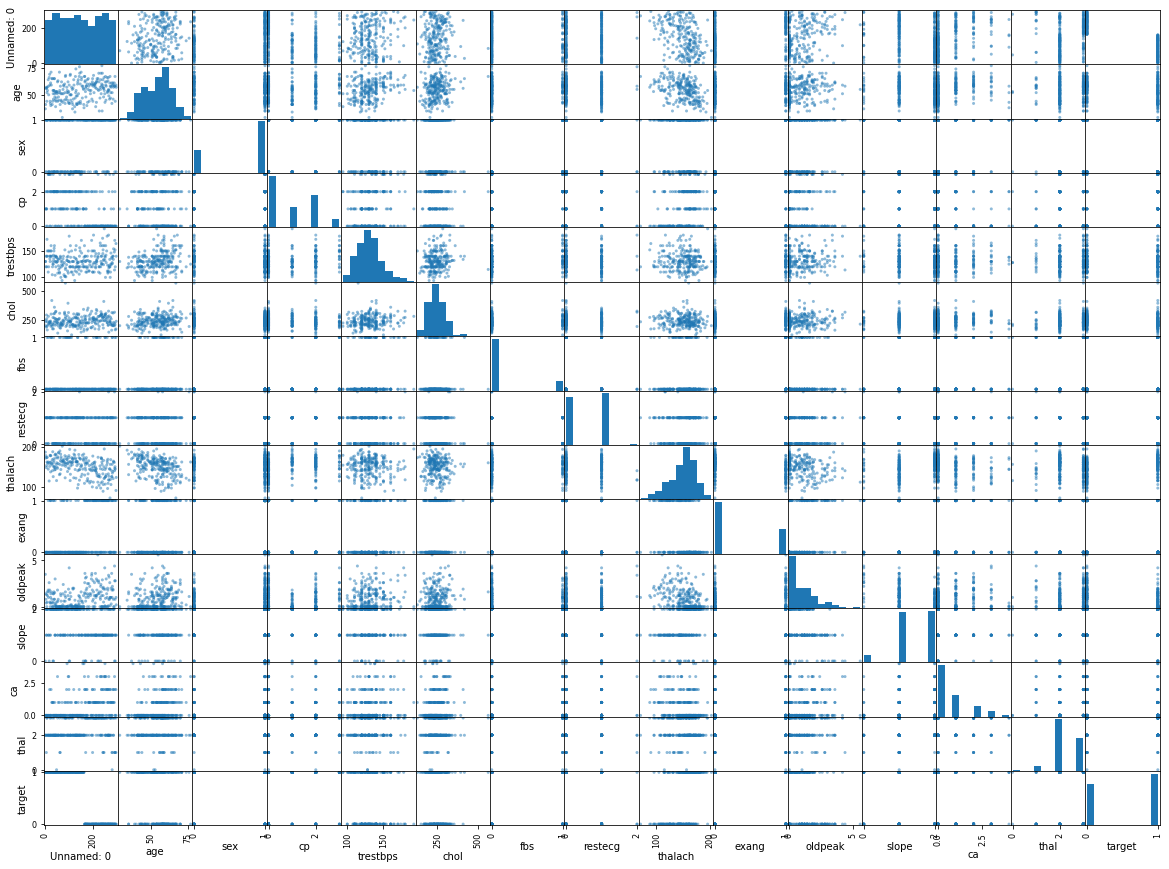

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(train, figsize=(20,15))
plt.show()

In [11]:
corr = train.corr()
corr

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Unnamed: 0,1.000000,0.197587,0.231722,-0.446235,0.091558,0.061948,-0.019005,-0.027236,-0.437238,0.380609,0.279793,-0.266185,0.383379,0.173404,-0.866355
age,0.197587,1.000000,-0.090145,-0.002046,0.283311,0.192855,0.105351,-0.100140,-0.408401,0.098468,0.180510,-0.144988,0.282568,0.071839,-0.224426
sex,0.231722,-0.090145,1.000000,-0.074827,-0.058782,-0.157115,0.025412,-0.055709,-0.030198,0.164548,0.095845,-0.025332,0.150218,0.212142,-0.307158
cp,-0.446235,-0.002046,-0.074827,1.000000,0.130735,-0.083446,0.133401,0.005303,0.299600,-0.385408,-0.135667,0.152331,-0.182617,-0.176251,0.477878
trestbps,0.091558,0.283311,-0.058782,0.130735,1.000000,0.121748,0.173990,-0.086163,-0.041034,0.054500,0.155875,-0.104094,0.060423,0.043503,-0.122937
chol,0.061948,0.192855,-0.157115,-0.083446,0.121748,1.000000,0.013241,-0.157792,-0.029758,0.072898,0.092134,-0.029159,0.118771,0.132527,-0.108646
fbs,-0.019005,0.105351,0.025412,0.133401,0.173990,0.013241,1.000000,-0.074149,0.001041,0.038530,-0.021541,0.005179,0.136672,-0.046015,0.001544
restecg,-0.027236,-0.100140,-0.055709,0.005303,-0.086163,-0.157792,-0.074149,1.000000,0.026815,-0.074038,-0.041881,0.075188,-0.067255,-0.007829,0.143340
thalach,-0.437238,-0.408401,-0.030198,0.299600,-0.041034,-0.029758,0.001041,0.026815,1.000000,-0.378624,-0.358201,0.372770,-0.246157,-0.074381,0.447837
exang,0.380609,0.098468,0.164548,-0.385408,0.054500,0.072898,0.038530,-0.074038,-0.378624,1.000000,0.317463,-0.282899,0.141366,0.214546,-0.475378


### 데이터를 feature 와 label로 분리시키자.

In [12]:
train_features = train.loc[:,'age':'thal']
train_label = train.loc[:,'target']
test_features = test.loc[:,'age':'thal']
test_label = test.loc[:,'target']

## 데이터 정규화

### 가장 흔하고 보편적인 스탠다드 스케일러를 사용하자

In [15]:
from sklearn.preprocessing import StandardScaler 

In [16]:
scaler = StandardScaler()

In [17]:
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# 로지스틱 회귀

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_features, train_label)

LogisticRegression()

In [19]:
print('train acc :%.2f'%model.score(train_features,train_label))
print('test acc :%.2f'%model.score(test_features,test_label))
# 정답률 73.8%

train acc :0.87
test acc :0.74


In [20]:
model.coef_

array([[-0.17506883, -1.07770612,  1.07169   , -0.42950411, -0.2515506 ,
         0.09273528,  0.34259979,  0.69504611, -0.53419078, -0.72355777,
         0.16096772, -0.6469608 , -0.231291  ]])

# Feature Engineering

상관관계(|coef| > 0.6) 를 띄고 있는 sex, cp, thalach, oldpeak, thal만 피쳐를 잡아볼까? index = {2 3 8 10 

In [21]:
train

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
1,127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
2,111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
3,287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
4,108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
238,255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
239,72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
240,235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0


In [22]:
train_features_selected = train[['sex','cp','thalach','oldpeak','thal']]
train_features_selected

,sex,cp,thalach,oldpeak,thal
0,1,3,190,0.0,1
1,0,2,172,0.0,2
2,1,2,173,0.2,3
3,1,1,164,0.0,2
4,0,1,162,1.1,2
...,...,...,...,...,...
237,1,2,150,1.6,3
238,1,0,147,0.0,3
239,1,1,202,0.0,2
240,1,0,173,1.6,3


In [23]:
test_features_selected = test[['sex','cp','thalach','oldpeak','thal']]
test_features_selected

,sex,cp,thalach,oldpeak,thal
0,0,0,145,6.2,3
1,1,1,163,0.0,3
2,1,0,150,0.0,3
3,1,0,132,2.4,3
4,1,0,128,2.6,3
...,...,...,...,...,...
56,1,3,150,2.3,1
57,1,0,143,3.0,3
58,1,3,182,3.8,3
59,1,0,112,0.6,1


In [24]:
train_features_selected = scaler.fit_transform(train_features_selected)
test_features_selected = scaler.fit_transform(test_features_selected)

In [25]:
model2 = LogisticRegression()
model2.fit(train_features_selected,train_label)
print('train acc :%.2f'%model2.score(train_features_selected,train_label))
print('test acc :%.2f'%model2.score(test_features_selected, test_label))
# 큰 차이가 없네.

train acc :0.83
test acc :0.75


In [26]:
model2.coef_

array([[-0.87244063,  1.08796329,  0.88603833, -0.9275846 , -0.34196816]])

# LDA

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA_Model = LDA(store_covariance=True, n_components = 1)

In [28]:
LDA_train = LDA_Model.fit_transform(train_features, train_label)
LDA_test = LDA_Model.fit_transform(test_features, test_label)

In [29]:
model3 = LogisticRegression()
model3.fit(LDA_train, train_label)

LogisticRegression()

In [30]:
print('train acc :%.2f'%model3.score(LDA_train, train_label))
print('test acc :%.2f'%model3.score(LDA_test, test_label))
# 12% 올림.

train acc :0.87
test acc :0.87


# RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model4 = RandomForestClassifier(random_state = 42)
model4.fit(train_features, train_label)

RandomForestClassifier(random_state=42)

In [33]:
print('train acc :%.2f'%model4.score(train_features, train_label))
print('test acc :%.2f'%model4.score(test_features, test_label))

train acc :1.00
test acc :0.75
